In [1]:
## 데이터 전처리

import pandas as pd
import numpy as np
import sys
import pickle
import itertools

## 데이터 시각화
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
## 딥러닝 모델링

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib
import warnings
np.set_printoptions(threshold=sys.maxsize)
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler  = MinMaxScaler()

In [3]:
with open("C:/Users/Flora/3-1교과목 머신러닝/사출 data.pickle","rb") as file:
    data=pickle.load(file)

In [4]:
normal=data[data['error']==0]
normal

,temp_in_value,temp_out_value,error
10678,"[19.582808724763904, 19.59236131438574, 19.573...","[24.693444172446192, 24.674338993202518, 24.66...",0.0
10679,"[18.732628248420493, 18.780391196529674, 18.81...","[23.976999950808487, 23.96744736118665, 24.168...",0.0
10680,"[18.761286017286004, 18.751733427664167, 18.71...","[24.540602738496816, 24.53105014887498, 24.511...",0.0
10681,"[18.91412745123538, 18.91412745123538, 18.9141...","[24.473734611143964, 24.464182021522124, 24.50...",0.0
10682,"[18.81860155501702, 18.81860155501702, 18.7803...","[24.33044576681642, 24.292235408329077, 24.282...",0.0
...,...,...,...
108420,"[18.81860155501702, 18.856811913504362, 18.856...","[18.789943786151515, 18.952337809722724, 18.92...",0.0
108421,"[19.64012426249492, 19.621019083251248, 19.640...","[19.219810319134133, 19.238915498377807, 19.13...",0.0
108422,"[18.21678840884135, 18.293209125816034, 18.302...","[17.79647446548056, 18.293209125816034, 18.321...",0.0
108423,"[19.028758526697416, 19.03831111631925, 19.028...","[19.29623103610882, 19.29623103610882, 19.3057...",0.0


In [5]:
print("정상 갯수:",len(normal))

정상 갯수: 97747


In [6]:
error=data[data['error']==1]
error

,temp_in_value,temp_out_value,error
0,"[26.22185851193996, 26.231411101561797, 26.202...","[26.403357714754843, 26.3651473562675, 26.3460...",1.0
1,"[26.231411101561797, 26.202753332696286, 26.21...","[26.3651473562675, 26.346042177023826, 26.3269...",1.0
2,"[26.202753332696286, 26.212305922318123, 26.19...","[26.346042177023826, 26.326936997780155, 26.31...",1.0
3,"[26.212305922318123, 26.193200743074453, 26.68...","[26.326936997780155, 26.317384408158322, 26.31...",1.0
4,"[26.193200743074453, 26.68038281378809, 26.861...","[26.317384408158322, 26.317384408158322, 26.30...",1.0
...,...,...,...
10673,"[18.369629842790726, 18.369629842790726, 18.36...","[18.627549762580298, 18.627549762580298, 18.64...",1.0
10674,"[18.369629842790726, 18.369629842790726, 18.36...","[18.627549762580298, 18.64665494182397, 18.436...",1.0
10675,"[18.369629842790726, 18.369629842790726, 18.36...","[18.64665494182397, 18.436497970143577, 18.426...",1.0
10676,"[18.369629842790726, 18.369629842790726, 18.19...","[18.436497970143577, 18.42694538052174, 18.216...",1.0


In [7]:
print("불량 갯수:",len(error))

불량 갯수: 10678


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108425 entries, 0 to 108424
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   temp_in_value   108425 non-null  object 
 1   temp_out_value  108425 non-null  object 
 2   error           108425 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.5+ MB


In [9]:
data['error']=data['error'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108425 entries, 0 to 108424
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   temp_in_value   108425 non-null  object
 1   temp_out_value  108425 non-null  object
 2   error           108425 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 2.1+ MB


In [10]:
font_path="C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font',family=font)

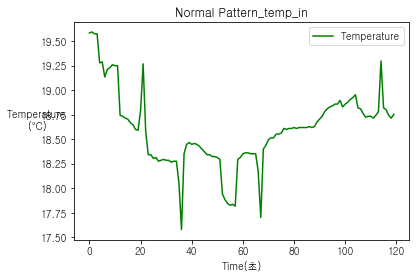

In [11]:
plt.plot(normal['temp_in_value'].iloc[0],'green',label='Temperature')
plt.xlabel("Time(초)")
plt.ylabel("Temperature\n(°C)",rotation=0)
plt.title("Normal Pattern_temp_in")
plt.legend()
plt.show()

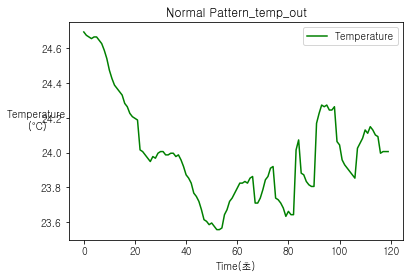

In [12]:
plt.plot(normal['temp_out_value'].iloc[0],'green',label='Temperature')
plt.xlabel("Time(초)")
plt.ylabel("Temperature\n(°C)",rotation=0)
plt.title("Normal Pattern_temp_out")
plt.legend()
plt.show()

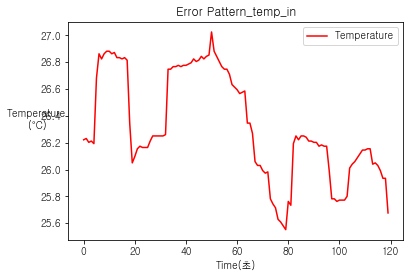

In [13]:
plt.plot(error['temp_in_value'].iloc[0],'r',label='Temperature')
plt.xlabel("Time(초)")
plt.ylabel("Temperature\n(°C)",rotation=0)
plt.title("Error Pattern_temp_in")
plt.legend()
plt.show()

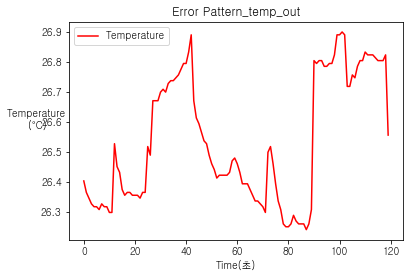

In [14]:
plt.plot(error['temp_out_value'].iloc[0],'r',label='Temperature')
plt.xlabel("Time(초)")
plt.ylabel("Temperature\n(°C)",rotation=0)
plt.title("Error Pattern_temp_out")
plt.legend()
plt.show()

In [15]:
data_in_length=[]
data_out_length=[]

for i in range(len(normal)):
    temp_in_length=len(normal['temp_in_value'].iloc[i])
    temp_out_length=len(normal['temp_out_value'].iloc[i])
    data_in_length.append(temp_in_length)
    data_out_length.append(temp_out_length)
    
normal['temp_in_length']=data_in_length
normal['temp_out_length']=data_out_length

In [16]:
print("냉각수 입구 온도 데이터 종류:",set(normal['temp_in_length']))

냉각수 입구 온도 데이터 종류: {120}


In [17]:
print("냉각수 출구 온도 데이터 종류:",set(normal['temp_out_length']))

냉각수 출구 온도 데이터 종류: {120}


In [18]:
X_in=np.array(list(itertools.chain.from_iterable(data['temp_in_value'])))

X_in=X_in.reshape(-1,120)

X_out=np.array(list(itertools.chain.from_iterable(data['temp_out_value'])))

X_out=X_out.reshape(-1,120)

X=np.concatenate([X_in,X_out],axis=1)

Y=np.array(data['error'])

Y=Y.reshape(-1,1)

In [19]:
X_in[10]

array([26.8809872 , 26.86188202, 26.87143461, 26.83322425, 26.83322425,
       26.82367166, 26.83322425, 26.81411907, 26.34604218, 26.0499119 ,
       26.09767485, 26.15499038, 26.17409556, 26.16454297, 26.16454297,
       26.16454297, 26.21230592, 26.25051628, 26.25051628, 26.25051628,
       26.25051628, 26.25051628, 26.26006887, 26.74725094, 26.74725094,
       26.76635612, 26.76635612, 26.77590871, 26.76635612, 26.77590871,
       26.77590871, 26.7854613 , 26.79501389, 26.82367166, 26.80456648,
       26.81411907, 26.84277684, 26.82367166, 26.84277684, 26.85232943,
       27.02427604, 26.8809872 , 26.84277684, 26.80456648, 26.76635612,
       26.74725094, 26.74725094, 26.70904058, 26.63261987, 26.61351469,
       26.59440951, 26.56575174, 26.57530433, 26.58485692, 26.34604218,
       26.34604218, 26.26962146, 26.05946449, 26.03080672, 26.03080672,
       25.99259636, 25.97349118, 25.98304377, 25.78243939, 25.74422903,
       25.71557126, 25.62959796, 25.61049278, 25.58183501, 25.55

In [20]:
scaler.fit(X_in)

X_in = scaler.transform(X_in)
X_out = scaler.transform(X_out)

In [21]:
X_in[10]

array([0.74322081, 0.73810856, 0.74125486, 0.73946785, 0.75594564,
       0.74929893, 0.74319066, 0.7361894 , 0.70816901, 0.69343891,
       0.69587337, 0.70204313, 0.71057094, 0.71469248, 0.7072758 ,
       0.70173475, 0.70932157, 0.70424107, 0.70472441, 0.71731651,
       0.71112372, 0.7077185 , 0.71477663, 0.73890785, 0.73681225,
       0.74613181, 0.73839185, 0.74063564, 0.74713303, 0.73630717,
       0.73464789, 0.74048836, 0.74189881, 0.74303582, 0.75242442,
       0.74007826, 0.74247492, 0.74930671, 0.74614537, 0.74645583,
       0.75788901, 0.74797188, 0.75027144, 0.74810401, 0.7468767 ,
       0.74986346, 0.74813967, 0.74485126, 0.72758037, 0.72866026,
       0.72400225, 0.7201346 , 0.74092686, 0.74440716, 0.73274974,
       0.71546053, 0.71871539, 0.70951586, 0.69677066, 0.69829013,
       0.69230769, 0.69362187, 0.69463087, 0.6785317 , 0.68486213,
       0.67518046, 0.67693169, 0.66943522, 0.6893617 , 0.66365688,
       0.6722878 , 0.68171429, 0.70232032, 0.70478873, 0.71428

In [22]:
scaler = StandardScaler()
scaler.fit(X_in)

X_in = scaler.transform(X_in)
X_out = scaler.transform(X_out)

In [23]:
X_in[10]

array([1.68950422, 1.68433794, 1.68746312, 1.67497882, 1.67440554,
       1.67149046, 1.67573349, 1.66926047, 1.51532817, 1.41792148,
       1.43368189, 1.4531798 , 1.45982227, 1.45740152, 1.45769422,
       1.45709611, 1.47319791, 1.48588915, 1.48685865, 1.48626245,
       1.48646783, 1.48663883, 1.48964383, 1.65103542, 1.65192754,
       1.65768842, 1.65761424, 1.66141118, 1.6586341 , 1.66207251,
       1.66196857, 1.66578244, 1.66899683, 1.67913362, 1.67301441,
       1.67672056, 1.68546274, 1.67959939, 1.6856783 , 1.68904284,
       1.74669958, 1.6986414 , 1.68716827, 1.67487593, 1.6617781 ,
       1.65570435, 1.65591368, 1.64460083, 1.61891078, 1.6125717 ,
       1.60656557, 1.59691932, 1.60048956, 1.60373868, 1.5239146 ,
       1.52378002, 1.49911632, 1.42955712, 1.42122338, 1.42134628,
       1.408779  , 1.4030916 , 1.40640876, 1.33960506, 1.32681805,
       1.31820934, 1.28944688, 1.28388545, 1.27436977, 1.26601215,
       1.33560427, 1.32598114, 1.47817039, 1.49709057, 1.48767

In [24]:

# scaler.fit(X_in)
# scaler.fit(X_out)
# scaler.fit(X)

In [25]:
X_in.shape,X_out.shape,X.shape,Y.shape

((108425, 120), (108425, 120), (108425, 240), (108425, 1))

In [26]:
yin = normal['temp_in_value'].iloc[0]
yout = normal['temp_out_value'].iloc[0]

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
degree = 2
features = PolynomialFeatures(degree = degree, include_bias = False)
x = np.arange(0, len(yin)).reshape(-1, 1)
xpoly = features.fit_transform(x)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()
model.fit(xpoly, yin)
model.score(xpoly, yin)

0.5835996532143298

In [31]:
model.intercept_

19.261249902005734

In [32]:
model.coef_

array([-0.03283509,  0.00027291])

In [33]:
yin = normal['temp_in_value'].iloc[0]
yout = normal['temp_out_value'].iloc[0]

In [34]:
x=  np.arange(0,len(yin)).reshape(-1, 1)

In [35]:
lmodel = LinearRegression()
lmodel.fit(x, yin)
lmodel.score(x, yin)

0.001049241900366149

In [36]:
lmodel.intercept_

18.622549784541324

In [37]:
lmodel.coef_

array([-0.00035881])

In [41]:
from sklearn.linear_model import LogisticRegression
rmodel = LogisticRegression()
rmodel.fit(X, Y)

LogisticRegression()

In [42]:
rmodel.intercept_

array([-0.27266288])

In [43]:
rmodel.coef_

array([[ 1.77486587e-01,  1.28580179e-01,  6.36439435e-02,
         4.70499776e-02,  1.87620122e-02, -4.15022288e-04,
         6.10782442e-03,  4.17574244e-03,  1.75489992e-02,
         3.17988257e-02,  1.26029071e-02,  1.19631619e-02,
         1.44340248e-02,  2.07171649e-02, -4.49633229e-04,
        -2.44186013e-03, -1.11143875e-03,  8.69781481e-04,
         2.53115992e-02,  1.50622217e-03,  1.61650637e-02,
         9.72677962e-03, -3.67769496e-03,  7.66342144e-03,
         2.03694061e-02,  1.46491905e-03, -3.61989141e-03,
        -1.91669918e-04,  1.92275885e-03, -1.04689580e-02,
        -3.54835079e-03, -8.35816203e-03, -1.44548390e-03,
         7.40150448e-03,  5.38302627e-03, -2.92832527e-03,
        -5.76954114e-03,  6.91706188e-03,  3.31587233e-03,
        -5.18044585e-03,  1.26688154e-03, -1.33485213e-02,
         1.27882398e-03,  7.38065338e-03, -2.94325143e-03,
        -3.64557240e-03,  6.89158144e-04,  1.30034240e-02,
        -8.09879412e-04, -3.83326668e-03, -1.13252123e-0

In [44]:
rmodel.score(X, Y)

0.9037952501729306